In [3]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()


  -  [Metadata(Student Performance Factors)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(Student Performance Factors)] Property "https://schema.org/version" is recommended, but does not exist.


[RecordSet(uuid="StudentPerformanceFactors.csv")]


,StudentPerformanceFactors.csv/Hours_Studied,StudentPerformanceFactors.csv/Attendance,StudentPerformanceFactors.csv/Parental_Involvement,StudentPerformanceFactors.csv/Access_to_Resources,StudentPerformanceFactors.csv/Extracurricular_Activities,StudentPerformanceFactors.csv/Sleep_Hours,StudentPerformanceFactors.csv/Previous_Scores,StudentPerformanceFactors.csv/Motivation_Level,StudentPerformanceFactors.csv/Internet_Access,StudentPerformanceFactors.csv/Tutoring_Sessions,StudentPerformanceFactors.csv/Family_Income,StudentPerformanceFactors.csv/Teacher_Quality,StudentPerformanceFactors.csv/School_Type,StudentPerformanceFactors.csv/Peer_Influence,StudentPerformanceFactors.csv/Physical_Activity,StudentPerformanceFactors.csv/Learning_Disabilities,StudentPerformanceFactors.csv/Parental_Education_Level,StudentPerformanceFactors.csv/Distance_from_Home,StudentPerformanceFactors.csv/Gender,StudentPerformanceFactors.csv/Exam_Score
0,23,84,b'Low',b'High',True,7,73,b'Low',True,0,b'Low',b'Medium',b'Public',b'Positive',3,True,b'High School',b'Near',b'Male',67
1,19,64,b'Low',b'Medium',True,8,59,b'Low',True,2,b'Medium',b'Medium',b'Public',b'Negative',4,True,b'College',b'Moderate',b'Female',61
2,24,98,b'Medium',b'Medium',True,7,91,b'Medium',True,2,b'Medium',b'Medium',b'Public',b'Neutral',4,True,b'Postgraduate',b'Near',b'Male',74
3,29,89,b'Low',b'Medium',True,8,98,b'Medium',True,1,b'Medium',b'Medium',b'Public',b'Negative',4,True,b'High School',b'Moderate',b'Male',71
4,19,92,b'Medium',b'Medium',True,6,65,b'Medium',True,3,b'Medium',b'High',b'Public',b'Neutral',4,True,b'College',b'Near',b'Female',70


# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. If not, diagnose the error. The code is related to building a linear regression model to predict student exam scores using the "Student Performance Factors (Kaggle)" dataset. The task involves data cleaning, visualization, splitting the data, training the model, visualizing predictions, and evaluating model performance.

## Data cleaning and preprocessing

### Subtask:
Inspect the data types, handle any missing values, and encode categorical features.


**Reasoning**:
Inspect the data types, check for missing values, and perform one-hot encoding on categorical columns to prepare the data for modeling.



In [5]:
# Inspect data types
print("Data types:")
print(record_set_df.dtypes)

# Check for missing values
print("\nMissing values:")
print(record_set_df.isnull().sum())

# The data types show some columns are of object type and contain byte strings (e.g., b'Low').
# Convert byte strings to regular strings
for col in record_set_df.columns:
    if record_set_df[col].dtype == 'object':
        record_set_df[col] = record_set_df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Identify categorical columns
categorical_cols = record_set_df.select_dtypes(include='object').columns
print("\nCategorical columns to encode:")
print(categorical_cols)

# Apply one-hot encoding
record_set_df_encoded = pd.get_dummies(record_set_df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
display(record_set_df_encoded.head())

Data types:
StudentPerformanceFactors.csv/Hours_Studied                  int64
StudentPerformanceFactors.csv/Attendance                     int64
StudentPerformanceFactors.csv/Parental_Involvement          object
StudentPerformanceFactors.csv/Access_to_Resources           object
StudentPerformanceFactors.csv/Extracurricular_Activities      bool
StudentPerformanceFactors.csv/Sleep_Hours                    int64
StudentPerformanceFactors.csv/Previous_Scores                int64
StudentPerformanceFactors.csv/Motivation_Level              object
StudentPerformanceFactors.csv/Internet_Access                 bool
StudentPerformanceFactors.csv/Tutoring_Sessions              int64
StudentPerformanceFactors.csv/Family_Income                 object
StudentPerformanceFactors.csv/Teacher_Quality               object
StudentPerformanceFactors.csv/School_Type                   object
StudentPerformanceFactors.csv/Peer_Influence                object
StudentPerformanceFactors.csv/Physical_Activity   

,StudentPerformanceFactors.csv/Hours_Studied,StudentPerformanceFactors.csv/Attendance,StudentPerformanceFactors.csv/Extracurricular_Activities,StudentPerformanceFactors.csv/Sleep_Hours,StudentPerformanceFactors.csv/Previous_Scores,StudentPerformanceFactors.csv/Internet_Access,StudentPerformanceFactors.csv/Tutoring_Sessions,StudentPerformanceFactors.csv/Physical_Activity,StudentPerformanceFactors.csv/Learning_Disabilities,StudentPerformanceFactors.csv/Exam_Score,...,StudentPerformanceFactors.csv/Teacher_Quality_Low,StudentPerformanceFactors.csv/Teacher_Quality_Medium,StudentPerformanceFactors.csv/School_Type_Public,StudentPerformanceFactors.csv/Peer_Influence_Neutral,StudentPerformanceFactors.csv/Peer_Influence_Positive,StudentPerformanceFactors.csv/Parental_Education_Level_High School,StudentPerformanceFactors.csv/Parental_Education_Level_Postgraduate,StudentPerformanceFactors.csv/Distance_from_Home_Moderate,StudentPerformanceFactors.csv/Distance_from_Home_Near,StudentPerformanceFactors.csv/Gender_Male
0,23,84,True,7,73,True,0,3,True,67,...,False,True,True,False,True,True,False,False,True,True
1,19,64,True,8,59,True,2,4,True,61,...,False,True,True,False,False,False,False,True,False,False
2,24,98,True,7,91,True,2,4,True,74,...,False,True,True,True,False,False,True,False,True,True
3,29,89,True,8,98,True,1,4,True,71,...,False,True,True,False,False,True,False,True,False,True
4,19,92,True,6,65,True,3,4,True,70,...,False,False,True,True,False,False,False,False,True,False


## Exploratory data analysis (eda)

### Subtask:
Perform basic visualizations to understand the relationships between features and the target variable ('Exam_Score').


**Reasoning**:
Create visualizations to explore the relationships between features and the target variable.



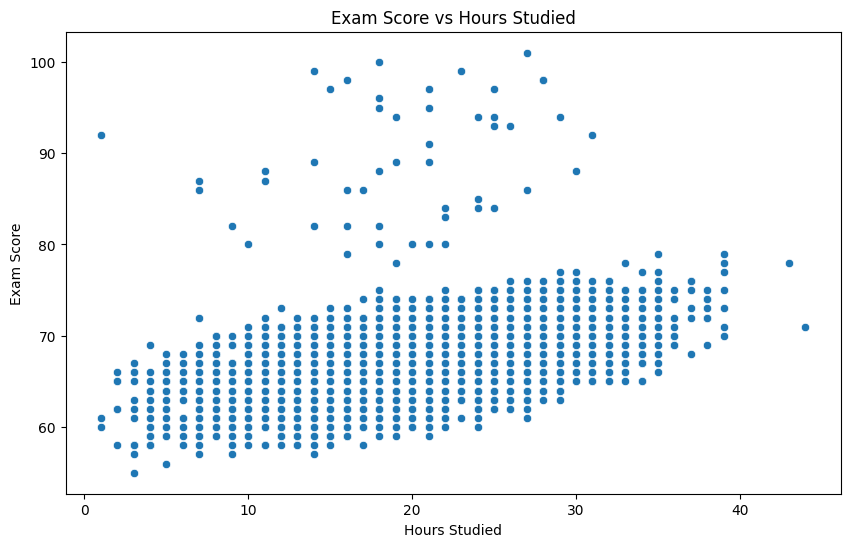

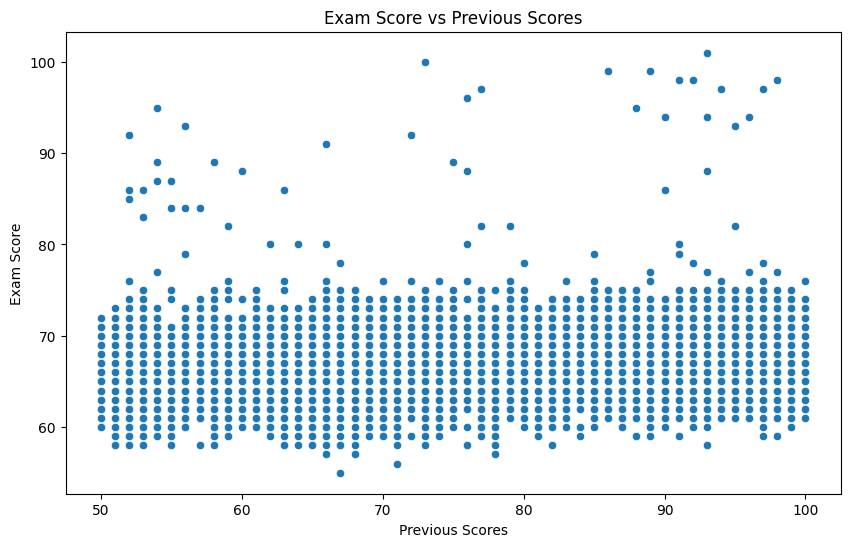

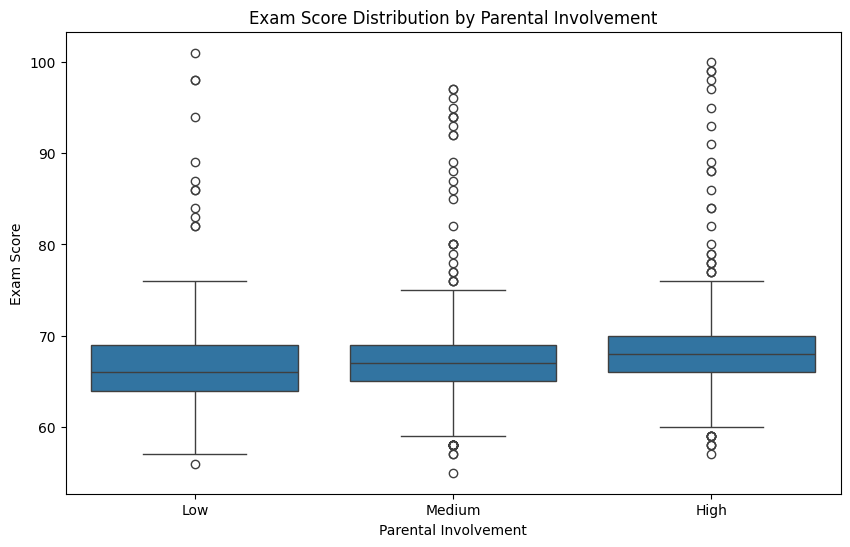

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot: 'Hours_Studied' vs 'Exam_Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudentPerformanceFactors.csv/Hours_Studied', y='StudentPerformanceFactors.csv/Exam_Score', data=record_set_df_encoded)
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

# 2. Scatter plot: 'Previous_Scores' vs 'Exam_Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudentPerformanceFactors.csv/Previous_Scores', y='StudentPerformanceFactors.csv/Exam_Score', data=record_set_df_encoded)
plt.title('Exam Score vs Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.show()

# 3. Box plot: 'Exam_Score' vs 'Parental_Involvement' (assuming it was not dropped and is available in original df)
# If 'Parental_Involvement' is not in the encoded df, use one of the one-hot encoded columns or another relevant categorical feature.
# Let's use the original 'Parental_Involvement' for the box plot as it's easier to interpret.
# We need to ensure 'Parental_Involvement' column still exists and is not one-hot encoded in the original df.
# Based on the previous step, 'Parental_Involvement' was one-hot encoded, so we need to use the original df or one of the encoded columns.
# Let's use the original 'Parental_Involvement' column from the record_set_df before encoding.
# If that's not available or suitable, we can pick an encoded column like 'Parental_Involvement_Medium'.
# Let's check if the original record_set_df is available and use 'Parental_Involvement' from there.

# If record_set_df is not available or 'Parental_Involvement' is not suitable, use an encoded column:
# Example using an encoded column (replace with an appropriate column from record_set_df_encoded):
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='StudentPerformanceFactors.csv/Parental_Involvement_Medium', y='StudentPerformanceFactors.csv/Exam_Score', data=record_set_df_encoded)
# plt.title('Exam Score Distribution by Parental Involvement (Medium)')
# plt.xlabel('Parental Involvement (Medium)')
# plt.ylabel('Exam Score')
# plt.show()

# Let's try to use the original 'Parental_Involvement' column from the record_set_df
if 'StudentPerformanceFactors.csv/Parental_Involvement' in record_set_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='StudentPerformanceFactors.csv/Parental_Involvement', y='StudentPerformanceFactors.csv/Exam_Score', data=record_set_df)
    plt.title('Exam Score Distribution by Parental Involvement')
    plt.xlabel('Parental Involvement')
    plt.ylabel('Exam Score')
    plt.show()
else:
    print("Original 'Parental_Involvement' column not available for box plot.")



## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets as instructed.



In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Assuming 'Exam_Score' is the target variable and all other columns are features
X = record_set_df_encoded.drop('StudentPerformanceFactors.csv/Exam_Score', axis=1)
y = record_set_df_encoded['StudentPerformanceFactors.csv/Exam_Score']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5285, 27)
Testing set shape: (1322, 27)


## Train the model

### Subtask:
Train a linear regression model on the training data.

**Reasoning**:
Train a Linear Regression model using the training data to learn the relationship between the features and the target variable.

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Evaluate the model

### Subtask:
Evaluate the model's performance using appropriate metrics.

**Reasoning**:
Evaluate the trained linear regression model's performance on the test set using common regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.57
Mean Squared Error (MSE): 3.39
Root Mean Squared Error (RMSE): 1.84
R-squared (R2): 0.76


# Task
Try polynomial regression and compare performance with the linear regression model.

## Generate polynomial features

### Subtask:
Create polynomial features from the existing features to capture non-linear relationships.


**Reasoning**:
Create polynomial features using PolynomialFeatures with degree 2 to capture non-linear relationships in the data.



In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Apply the transformation to the feature data X
X_poly = poly_features.fit_transform(X)

print("Shape of original features:", X.shape)
print("Shape of polynomial features:", X_poly.shape)

Shape of original features: (6607, 27)
Shape of polynomial features: (6607, 405)


## Split the data (polynomial features)

### Subtask:
Split the data with polynomial features into training and testing sets.


**Reasoning**:
Split the data with polynomial features into training and testing sets.



In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print("Training set shape (polynomial features):", X_train_poly.shape)
print("Testing set shape (polynomial features):", X_test_poly.shape)

Training set shape (polynomial features): (5285, 405)
Testing set shape (polynomial features): (1322, 405)


## Train the polynomial regression model

### Subtask:
Train a linear regression model on the data with polynomial features.


**Reasoning**:
Train a Linear Regression model using the polynomial features from the training data to capture the non-linear relationships with the target variable.



In [18]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_poly = LinearRegression()

# Train the model using the polynomial features from the training data
model_poly.fit(X_train_poly, y_train)

print("Polynomial Linear Regression model training complete.")

Polynomial Linear Regression model training complete.


## Visualize polynomial predictions

### Subtask:
Make predictions using the polynomial model and visualize the actual vs. predicted scores.


**Reasoning**:
Use the trained polynomial model to make predictions on the test set and visualize the actual vs. predicted values to assess the model's performance visually.



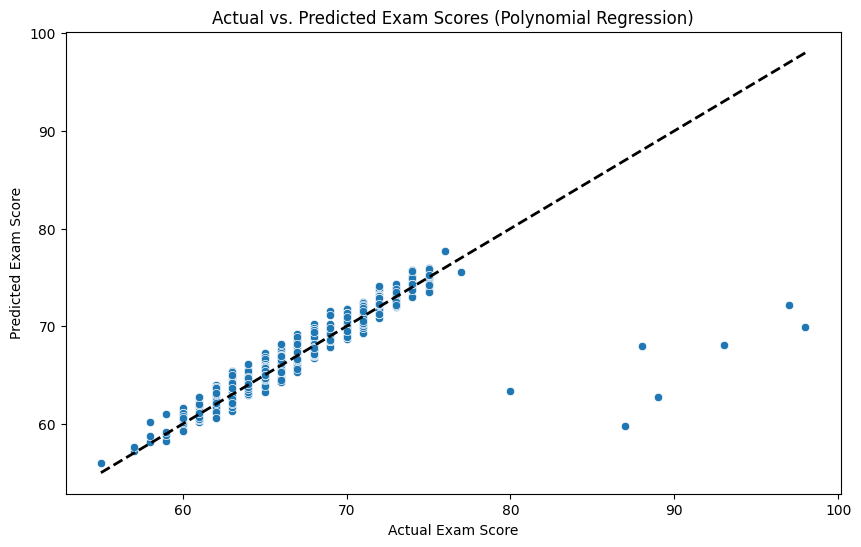

In [20]:
# Make predictions using the polynomial model
y_pred_poly = model_poly.predict(X_test_poly)

# Create a scatter plot of actual vs. predicted scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)

# Add a diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.title('Actual vs. Predicted Exam Scores (Polynomial Regression)')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.show()

## Evaluate the polynomial model

### Subtask:
Evaluate the polynomial model's performance using the same metrics as before.


**Reasoning**:
Evaluate the trained polynomial regression model's performance on the test set using common regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.



In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Model Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Polynomial Model Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Model Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"Polynomial Model R-squared (R2): {r2_poly:.2f}")

Polynomial Model Mean Absolute Error (MAE): 0.71
Polynomial Model Mean Squared Error (MSE): 3.67
Polynomial Model Root Mean Squared Error (RMSE): 1.91
Polynomial Model R-squared (R2): 0.74


## Compare model performance

### Subtask:
Compare the evaluation metrics of the linear regression model and the polynomial regression model.


**Reasoning**:
Print the evaluation metrics for both models to compare their performance.



In [22]:
# Print evaluation metrics for Linear Regression
print("Linear Regression Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared (R2): {r2:.2f}")

print("\nPolynomial Regression Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"  Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"  R-squared (R2): {r2_poly:.2f}")

# Comment on which model performs better
print("\nComparison Summary:")
if mae < mae_poly and mse < mse_poly and rmse < rmse_poly and r2 > r2_poly:
    print("Based on MAE, MSE, RMSE, and R2, the Linear Regression model appears to perform better.")
elif mae > mae_poly and mse > mse_poly and rmse > rmse_poly and r2 < r2_poly:
     print("Based on MAE, MSE, RMSE, and R2, the Polynomial Regression model appears to perform better.")
else:
    print("Performance comparison is mixed across metrics, or the difference is not clear.")

Linear Regression Model Performance:
  Mean Absolute Error (MAE): 0.57
  Mean Squared Error (MSE): 3.39
  Root Mean Squared Error (RMSE): 1.84
  R-squared (R2): 0.76

Polynomial Regression Model Performance:
  Mean Absolute Error (MAE): 0.71
  Mean Squared Error (MSE): 3.67
  Root Mean Squared Error (RMSE): 1.91
  R-squared (R2): 0.74

Comparison Summary:
Based on MAE, MSE, RMSE, and R2, the Linear Regression model appears to perform better.


## Summary:

### Data Analysis Key Findings

*   The polynomial regression model with degree 2 resulted in a Mean Absolute Error (MAE) of 0.71, a Mean Squared Error (MSE) of 3.67, a Root Mean Squared Error (RMSE) of 1.91, and an R-squared (\(R^2\)) of 0.74 on the test set.
*   Comparing the polynomial model to the previously evaluated linear regression model (MAE: 0.57, MSE: 3.39, RMSE: 1.84, \(R^2\): 0.76), the linear regression model showed better performance across all evaluated metrics.

### Insights or Next Steps

*   Based on the current evaluation metrics, the linear regression model is the preferred choice for this dataset as it demonstrates better predictive performance than the polynomial regression model of degree 2.
*   Further analysis could involve exploring different polynomial degrees or incorporating regularization techniques to potentially improve the polynomial model's performance and mitigate overfitting.
